In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [64]:
second = pd.read_excel('./data/delete_duplicated.xlsx')

## 우유군
- 2192 - 2231

- 우유군에 해당하는 식품군을 가져온다.

In [65]:
tmp_01 = second[2192:(2231 + 1)]

In [66]:
tmp_01.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
2192,4138,우유 및 유제품,모유,100,65.0,7.20,1.10,3.50,6.40,15.0,15.00,1.32,0,2017
2193,4140,우유 및 유제품,"분유, 1단계",100,524.0,56.88,12.41,25.75,49.01,164.0,50.95,11.35,0,2017
2194,4142,우유 및 유제품,"분유, 2단계",100,522.0,56.93,12.63,25.38,49.00,171.0,53.05,11.34,0,2017
2195,4144,우유 및 유제품,"분유, 3단계",100,491.0,56.04,16.91,20.65,43.85,185.0,61.33,9.35,0,2017
2196,4146,우유 및 유제품,"분유, 전지",100,514.0,39.07,25.46,27.32,38.63,322.0,83.80,18.02,0,2017


In [67]:
tmp_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2192 to 2231
Data columns (total 14 columns):
번호            40 non-null int64
식품군           40 non-null object
식품이름          40 non-null object
1회제공량 (g)     40 non-null int64
열량 (kcal)     40 non-null float64
탄수화물 (g)      40 non-null float64
단백질 (g)       40 non-null float64
지방 (g)        40 non-null float64
당류 (g)        36 non-null float64
나트륨 (mg)      40 non-null float64
콜레스테롤 (mg)    38 non-null float64
포화지방산 (g)     38 non-null float64
트랜스지방산 (g)    40 non-null int64
년도            40 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 4.7+ KB


In [68]:
tmp_01.shape

(40, 14)

# 설정 파리미터

In [69]:
want_kcal = 125
error_rate = 0.1
# 지방 / 단백질
rate = 7 / 6
plus_rate = rate + (rate * error_rate)
print("양의 오차 = ", plus_rate)
minus_rate = rate - (rate * error_rate)
print("음의 오차 = ", minus_rate)

양의 오차 =  1.2833333333333334
음의 오차 =  1.05


In [70]:
total = tmp_01

In [71]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
2192,4138,우유 및 유제품,모유,100,65.0,7.20,1.10,3.50,6.40,15.0,15.00,1.32,0,2017
2193,4140,우유 및 유제품,"분유, 1단계",100,524.0,56.88,12.41,25.75,49.01,164.0,50.95,11.35,0,2017
2194,4142,우유 및 유제품,"분유, 2단계",100,522.0,56.93,12.63,25.38,49.00,171.0,53.05,11.34,0,2017
2195,4144,우유 및 유제품,"분유, 3단계",100,491.0,56.04,16.91,20.65,43.85,185.0,61.33,9.35,0,2017
2196,4146,우유 및 유제품,"분유, 전지",100,514.0,39.07,25.46,27.32,38.63,322.0,83.80,18.02,0,2017


## index reset

In [72]:
total = total.reset_index()
del total['index']
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,4138,우유 및 유제품,모유,100,65.0,7.20,1.10,3.50,6.40,15.0,15.00,1.32,0,2017
1,4140,우유 및 유제품,"분유, 1단계",100,524.0,56.88,12.41,25.75,49.01,164.0,50.95,11.35,0,2017
2,4142,우유 및 유제품,"분유, 2단계",100,522.0,56.93,12.63,25.38,49.00,171.0,53.05,11.34,0,2017
3,4144,우유 및 유제품,"분유, 3단계",100,491.0,56.04,16.91,20.65,43.85,185.0,61.33,9.35,0,2017
4,4146,우유 및 유제품,"분유, 전지",100,514.0,39.07,25.46,27.32,38.63,322.0,83.80,18.02,0,2017


### Nan 값을 0.0 으로 채워 넣는다

In [73]:
total = total.fillna(0.0)

### 각 열의 값을 가져온다 

In [74]:
kcal = total['열량 (kcal)']
amount = total['1회제공량 (g)']
carbo = total['탄수화물 (g)']
protain = total['단백질 (g)']
fatt = total['지방 (g)']

### 설정한 칼로리에 따라 비례식을 계산한다.

In [75]:
new_amount = (want_kcal * amount) / kcal 
new_carbo  = (want_kcal * carbo) / kcal 
new_protain  = (want_kcal * protain) / kcal 
new_fatt  = (want_kcal * fatt) / kcal 

### 도출된 각 영양 성분을 가지고 칼로리를 계산한다.

In [76]:
estimate_kcal = (new_carbo * 4) + (new_protain * 4) + (new_fatt * 9)

### 각 열에 데이터를 업데이트 한다.

In [77]:
total['열량 (kcal)'] = want_kcal
total['1회제공량 (g)'] = new_amount
total['탄수화물 (g)'] = new_carbo
total['단백질 (g)'] = new_protain
total['지방 (g)'] = new_fatt

In [78]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,6.40,15.0,15.00,1.32,0,2017
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,49.01,164.0,50.95,11.35,0,2017
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,49.00,171.0,53.05,11.34,0,2017
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,43.85,185.0,61.33,9.35,0,2017
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,38.63,322.0,83.80,18.02,0,2017


## 칼로리 오차를 구한다

In [79]:
error = ( estimate_kcal - want_kcal ) 
total['Error'] = error
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도,Error
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,6.40,15.0,15.00,1.32,0,2017,-0.576923
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,49.01,164.0,50.95,11.35,0,2017,-3.599714
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,49.00,171.0,53.05,11.34,0,2017,-3.673372
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,43.85,185.0,61.33,9.35,0,2017,-3.398676
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,38.63,322.0,83.80,18.02,0,2017,-2.431907


In [80]:
del total['당류 (g)']
del total['나트륨 (mg)']
del total['콜레스테롤 (mg)']
del total['포화지방산 (g)']
del total['트랜스지방산 (g)']
del total['년도']

In [81]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907


### 영양 성분의 비를 연산한다.

In [82]:
new_rate =  new_fatt / new_protain

In [83]:
tmp_rate = new_rate.between(minus_rate, plus_rate)
total['survived'] = tmp_rate

In [84]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923,False
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714,False
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372,False
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676,True
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907,True


In [85]:
serv = [] 
for i in total['survived']:
    if i:
        serv.append(1)
    else :
        serv.append(0)
total['b_servived'] = serv

In [86]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923,False,0
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714,False,0
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372,False,0
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676,True,1
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907,True,1


In [87]:
total.describe()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,b_servived
count,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000
mean,4174.650000,103.988156,125.0,12.770679,5.356072,5.658922,-1.562700,0.200000
std,21.022028,83.499108,0.0,7.935510,3.655366,3.343793,2.529822,0.405096
min,4138.000000,23.854962,125.0,0.373134,0.625000,0.036232,-4.973822,0.000000
25%,4157.500000,36.913646,125.0,5.600188,2.488689,3.003374,-3.618128,0.000000
50%,4175.500000,66.335867,125.0,13.739408,4.356887,5.814956,-2.179315,0.000000
75%,4192.250000,172.438742,125.0,18.040436,7.227000,7.218432,-0.121204,0.000000
max,4209.000000,378.787879,125.0,28.248031,15.833333,12.894737,6.365741,1.000000


In [88]:
total.shape

(40, 11)

In [89]:
total['survived'].value_counts()

False    32
True      8
Name: survived, dtype: int64

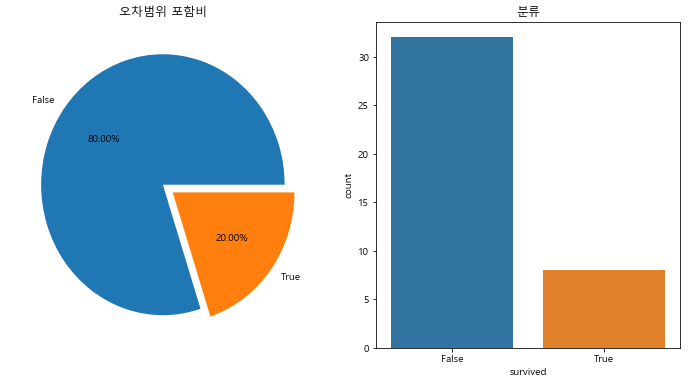

In [90]:
f,ax=plt.subplots(1, 2,figsize=(12,6))

total['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('오차범위 포함비')
ax[0].set_ylabel('')

sns.countplot('survived',data=total, ax=ax[1])
ax[1].set_title('분류')
plt.savefig('result_rate.png')
plt.show()

In [91]:
total.corr()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
번호,1.000000,0.098451,NaN,-0.517768,0.338302,0.379932,-0.021673,-0.196314,-0.196314
1회제공량 (g),0.098451,1.000000,NaN,0.294875,0.277772,-0.451895,-0.070370,0.042043,0.042043
열량 (kcal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
탄수화물 (g),-0.517768,0.294875,NaN,1.000000,-0.366575,-0.882241,-0.066453,-0.018947,-0.018947
단백질 (g),0.338302,0.277772,NaN,-0.366575,1.000000,-0.107739,-0.101465,-0.030433,-0.030433
지방 (g),0.379932,-0.451895,NaN,-0.882241,-0.107739,1.000000,0.203453,0.028532,0.028532
Error,-0.021673,-0.070370,NaN,-0.066453,-0.101465,0.203453,1.000000,-0.074214,-0.074214
survived,-0.196314,0.042043,NaN,-0.018947,-0.030433,0.028532,-0.074214,1.000000,1.000000
b_servived,-0.196314,0.042043,NaN,-0.018947,-0.030433,0.028532,-0.074214,1.000000,1.000000


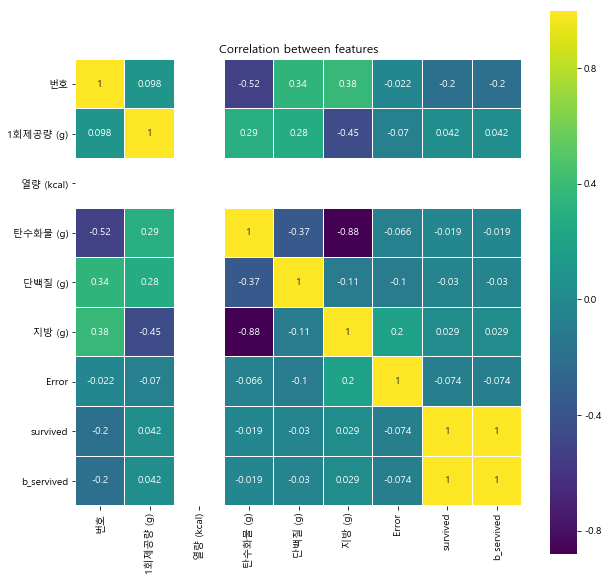

In [92]:
plt.figure(figsize=(10, 10))
sns.heatmap(total.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.savefig('heatmap.png')
plt.show()

In [93]:
include = []
exclude = []
for i, d in enumerate(tmp_rate):
    if d:
        include.append(i)
    else:
        exclude.append(i)

In [94]:
milk_normal_01_include = total.loc[include]
milk_normal_01_exclude = total.loc[exclude]

In [95]:
milk_normal_01_include.to_excel('milk_normal_01_include.xlsx')
milk_normal_01_exclude.to_excel('milk_normal_01_exclude.xlsx')

In [96]:
milk_normal_01_include

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676,True,1
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907,True,1
6,4150,우유 및 유제품,산양유,201.612903,125,8.125000,6.370968,7.298387,-1.330645,True,1
7,4152,우유 및 유제품,샤베트,98.425197,125,28.248031,0.885827,0.984252,0.393701,True,1
21,4178,우유 및 유제품,우유,189.393939,125,10.473485,5.833333,6.287879,-3.181818,True,1
22,4179,우유 및 유제품,"우유, 고지방",171.232877,125,8.904110,5.993151,7.191781,-0.684932,True,1
25,4185,우유 및 유제품,"우유, 바나나맛",134.408602,125,17.647849,3.534946,4.059140,-3.736559,True,1
33,4198,우유 및 유제품,"치즈, 체다",42.517007,125,2.623299,7.976190,9.056122,-1.096939,True,1


In [97]:
milk_normal_01_exclude

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923,False,0
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714,False,0
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372,False,0
5,4148,우유 및 유제품,"분유, 탈지",34.340659,125,18.255495,11.634615,0.333104,-2.441621,False,0
8,4154,우유 및 유제품,아이스밀크,74.850299,125,17.889222,2.544910,4.790419,-0.149701,False,0
9,4156,우유 및 유제품,아이스크림(유지방 12%),58.962264,125,13.207547,2.063679,7.075472,-0.235849,False,0
10,4158,우유 및 유제품,"아이스크림, 딸기맛",65.104167,125,17.968750,2.083333,5.468750,4.427083,False,0
11,4160,우유 및 유제품,"아이스크림, 바닐라맛",67.567568,125,15.033784,3.364865,5.290541,-3.790541,False,0
12,4162,우유 및 유제품,"아이스크림, 소프트 바닐라맛",60.386473,125,14.251208,2.113527,6.642512,0.241546,False,0
13,4164,우유 및 유제품,"아이스크림, 초콜렛맛",57.870370,125,16.319444,2.199074,6.365741,6.365741,False,0


In [100]:
milk_normal  = milk_normal_01_include[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)']]
milk_normal.head()

,번호,탄수화물 (g),단백질 (g),지방 (g)
3,4144,14.266802,4.304990,5.257128
4,4146,9.501459,6.191634,6.643969
6,4150,8.125000,6.370968,7.298387
7,4152,28.248031,0.885827,0.984252
21,4178,10.473485,5.833333,6.287879


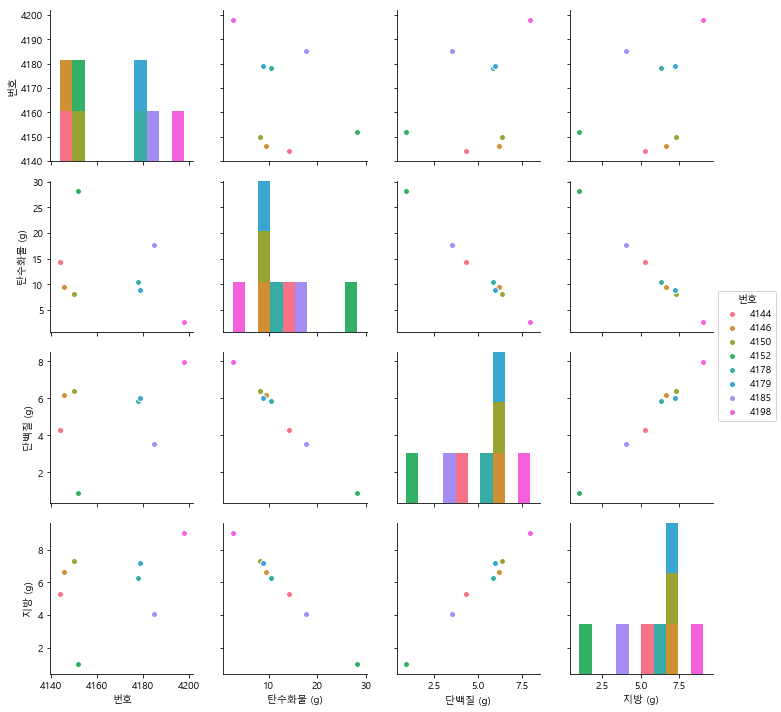

In [101]:
g = sns.pairplot(milk_normal, hue='번호',palette="husl")

In [102]:
milk_normal_01_include['식품군'].value_counts()

우유 및 유제품    8
Name: 식품군, dtype: int64

In [104]:
milk_normal_01_exclude['식품군'].value_counts()

우유 및 유제품    32
Name: 식품군, dtype: int64

In [105]:
milkkk  = total[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)', 'b_servived']]
milkkk.head()

,번호,탄수화물 (g),단백질 (g),지방 (g),b_servived
0,4138,13.846154,2.115385,6.730769,0
1,4140,13.568702,2.960401,6.142653,0
2,4142,13.632663,3.024425,6.077586,0
3,4144,14.266802,4.304990,5.257128,1
4,4146,9.501459,6.191634,6.643969,1


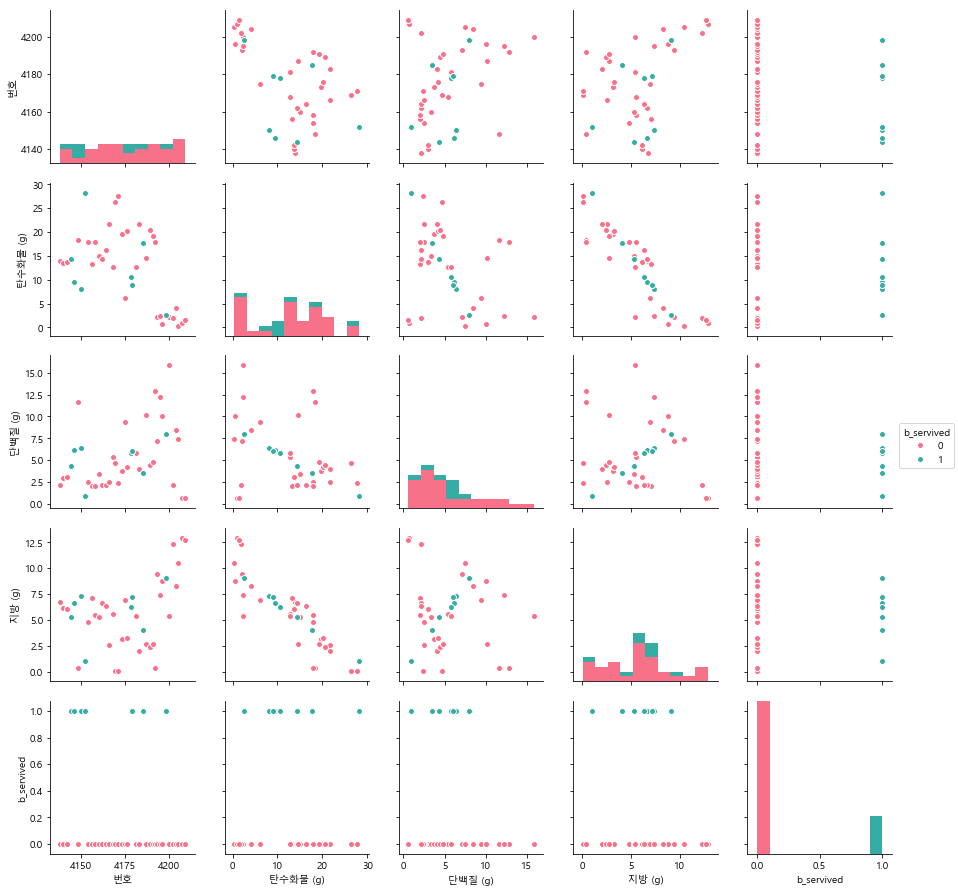

In [106]:
sns_plot = sns.pairplot(milkkk, hue='b_servived',palette="husl")

In [59]:
sns_plot.savefig("milk_output.png")